In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 简单的数据清洗

In [63]:
train = pd.read_csv('/home/jakey/文档/kaggle/House_price/train.csv')
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [64]:
test = pd.read_csv('/home/jakey/文档/kaggle/House_price/test.csv')
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [88]:
all_features = pd.concat([train.loc[:,'MSSubClass':'SalePrice'],test.loc[:,'MSSubClass':'SaleCondition']], ignore_index=True, sort = False)

In [89]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index

#### 数值特征缩放

In [90]:
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x-x.mean())/(x.std()))

#### 对非数值特征进行onehot编码

In [91]:
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features = all_features.fillna(all_features.mean())

#### 进行模型训练

In [125]:
from sklearn.linear_model import LinearRegression
X = all_features.iloc[:train.shape[0], :-1].values
Y = train.iloc[:,-1].values
X_test = all_features.iloc[train.shape[0]:, :-1].values

In [100]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
pre = regression.predict(x_test)

In [106]:
test['SalePrice'] = pre

In [107]:
submission = pd.concat([test['Id'], test['SalePrice']], axis=1)

In [108]:
submission.to_csv('/home/jakey/文档/kaggle/House_price/result/submission3.csv', index=False)

###  result: 评分不理想，考虑数据分析和清洗的重要性，以及换用稍复杂的线性模型

### 细化数据的分析和处理

In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# from scipy import stats
def ignore_warning(*args, **kswags):
    pass

In [168]:
train = pd.read_csv('/home/jakey/文档/kaggle/House_price/train.csv')
test = pd.read_csv('/home/jakey/文档/kaggle/House_price/test.csv')

In [171]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [172]:
test_ID = test['Id'].values
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1,inplace=True)

### 数据处理

#### 离群值

Text(0,0.5,'SalePrice')

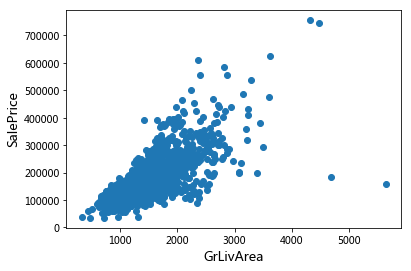

In [65]:
#房子的平方和房价的关系
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

#### 删除右下角的偏离值

In [66]:
train = train.loc[(train['GrLivArea'] < 4000) | 
             (train['SalePrice'] > 300000)]

### 目标变量

目标变量是需要预测的值，所以对它进行分析

/home/jakey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180932.92 and sigma = 79467.79



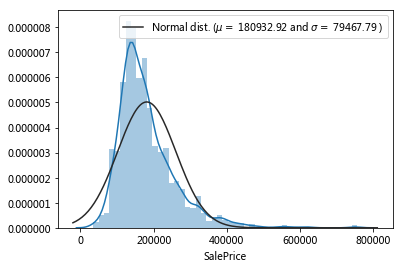

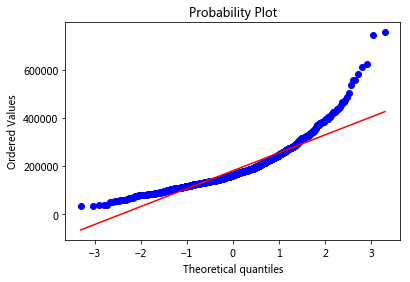

In [67]:
from scipy.stats import *
#纵坐标为概率密度
#kde为核密度:仅靠数据本身依靠临近点的概率来进行估计，从而画出连续的概率密度函数图，进行最大程度的拟合
#如果没有fit=norm参数，则不会显示途中的灰色曲线（正太分布曲线，用于对比）
sns.distplot(train['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
fig = plt.figure()
#按正态分布拟合数据并画图，横坐标为分位数
res = probplot(train['SalePrice'], plot=plt)
plt.show()

线性回归对正太分布的数据效果更好，但从目标数据的拟合上来看，其与正态分布有一些差距，有着明显的倾斜

#### 对目标变量进行对数转化

/home/jakey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


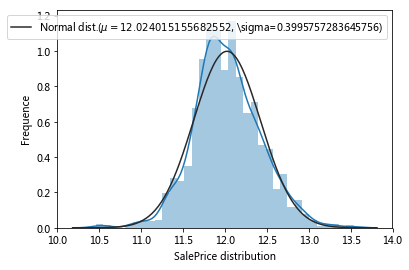

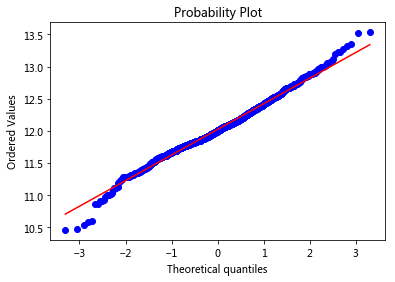

In [68]:
#使用numpy函数对log1p,对所有值进行log(1+x)的运算
train['SalePrice'] = np.log1p(train['SalePrice'])

#查看最新的分布
sns.distplot(train['SalePrice'], fit=norm)

#获得此时正太分布拟合的参数mu和sigma
(mu, sigma) = norm.fit(train['SalePrice'])

#在画出分布图
plt.legend(['Normal dist.($\mu={},$\sigma={})'.format(mu, sigma)],loc='best')
plt.xlabel('SalePrice distribution')
plt.ylabel('Frequence')

#画出点的拟合
fig = plt.figure()
probplot(train['SalePrice'], plot=plt)
plt.show()

对目标数值转换之后，目标数值能够被正太分布较好的拟合

### 处理特征值

In [69]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat([train, test], ignore_index=True, sort=False)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2917, 79)

#### 缺失值处理

In [70]:
#统计每列的缺失值的总数所占百分比
all_data_na = all_data.isnull().sum()/len(all_data) * 100

#保留前30个确实值最多的列
all_data_na = all_data_na.drop(all_data_na[all_data_na.values==0].index).sort_values(ascending=False)[:30]

missing_data = pd.DataFrame({'Missing Radio':all_data_na})
missing_data

,Missing Radio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0,0.5,'Percent of missing values')

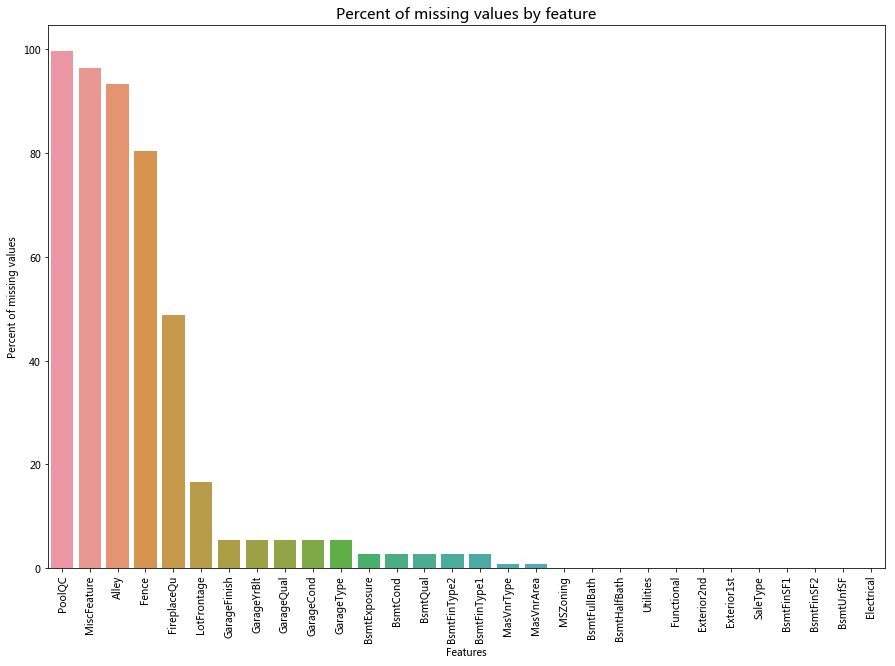

In [71]:
fig = plt.figure(figsize=(15, 10))
sns.barplot(x=missing_data.index, y=missing_data['Missing Radio'].values)
plt.xticks(rotation=90)
plt.title('Percent of missing values by feature', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Percent of missing values')

#### 做相关性图像，分析各特征与目标特征的相关性

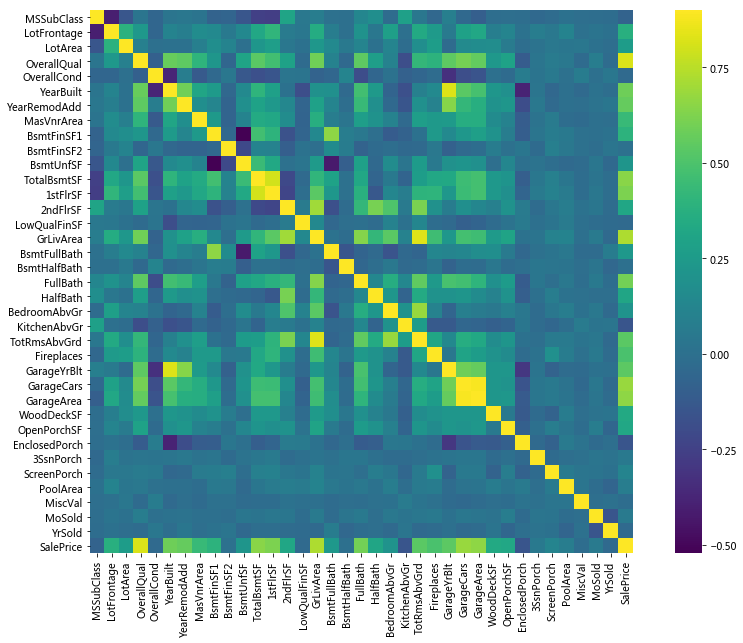

In [72]:
corrmat = train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrmat, cmap='viridis', square=True, vmax=0.9)

#### 输入缺失值

##### PoolQC : 
该字段在描述时将‘NA'描述为‘没有泳池’，这是正确的，应为从统计上看99%的房子都没有泳池

In [73]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

#### MiscFeature : 
该字段在描述是说NA表示为‘没有misc功能’

In [74]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

#### Alley:
该字段描述NA为没有小巷可以进入

In [75]:
all_data['Alley'] = all_data['Alley'].fillna('None')

#### Fence:
该字段描述NA为没有篱笆

In [76]:
all_data['Fence'] = all_data['Fence'].fillna('None')

#### FireplaceQu:
该字段描述NA为'没有秘鲁'

In [77]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#### LotFrontage:
与每个房子相连接的区域和街道可能会跟它附近的房屋具有相同的区域，所以填充NA为相邻房屋街道的中位数

In [78]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#### GarageType, GarageFinish, GarageQual and GarageCond ：
将缺失值代替为None

In [79]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

#### GarageYrBlt, GarageArea and GarageCars : 
将缺失值替换为0，因为没有车库，也意味着这里没有车

In [80]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

#### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : 
缺失值更像是没有地下室，所以填充为0

In [81]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 
这些分类依据相关的数据，NAN意味着没有地下室

In [82]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

#### MasVnrArea and MasVnrType : 
NA意味着这些房子没有这些砖石地面，因此填充面积为0，类型为None

In [83]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#### MSZoning (The general zoning classification):
众数也是常见的数值，将缺失值填充为众数

In [84]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode().iloc[0])

#### Utilities : 
该字段除了两个NA和一个'NoSeWa'其余都是'AllPub',其对训练结果没什么关系，因此去掉NA的值

In [85]:
all_data = all_data.drop(['Utilities'], axis=1)

#### Functional : 
该字段解释NA值为typical

In [86]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

#### Electrical :
该值有一个NA值，该字段大部分值都为SBrkr,因此可以使用众数填充

In [87]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode().iloc[0])

#### KitchenQual: 
Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [88]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#### Exterior1st and Exterior2nd : 
Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [89]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

#### SaleType : 
Fill in again with most frequent which is "WD"

In [90]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

#### MSSubClass : 
Na most likely means No building class. We can replace missing values with None

In [91]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

#### Is there any remaining missing value ?

In [92]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### 更多的数据处理

#### 转换一些数值变量为分类变量

In [93]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond：Overall condition rating
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data.shape

(2917, 78)

#### 对一些分类变量进行labelenconde

In [94]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder() 
    all_data[c] = lbl.fit_transform(list(all_data[c].values)) 
all_data.shape

(2917, 78)

#### 添加一个更重要的特征

由于面积的大小对房价的大小至关重要,所以这里添加一个地下室1层，地下室2层，一层和二层的总面积

In [95]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

#### 查看数据的偏度
正态分布的偏度为0，两侧尾部长度对称。若以bs表示偏度。bs<0称分布具有负偏离，也称左偏态，此时数据位于均值左边的比位于右边的少，直观表现为左边的尾部相对于与右边的尾部要长，因为有少数变量值很小，使曲线左侧尾部拖得很长；bs>0称分布具有正偏离，也称右偏态，此时数据位于均值右边的比位于左边的少，直观表现为右边的尾部相对于与左边的尾部要长，因为有少数变量值很大，使曲线右侧尾部拖得很长；而bs接近0则可认为分布是对称的。若知道分布有可能在偏度上偏离正态分布时，可用偏离来检验分布的正态性。右偏时一般算术平均数>中位数>众数，左偏时相反，即众数>中位数>平均数。正态分布三者相等。

In [96]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

#检查数据的偏度
skewed_feets = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'SKEW':skewed_feets})
skewness.shape

(59, 1)

#### 对偏离特征的转换

Box-Cox变换是Box和Cox在1964年提出的一种广义幂变换方法，是统计建模中常用的一种数据变换，用于连续的响应变量不满足正态分布的情况。Box-Cox变换之后，可以一定程度上减小不可观测的误差和预测变量的相关性。Box-Cox变换的主要特点是引入一个参数，通过数据本身估计该参数进而确定应采取的数据变换形式，Box-Cox变换可以明显地改善数据的正态性、对称性和方差相等性，对许多实际数据都是行之有效的。

#### 通过scipy库的boxcox1p类来转换数值，其公式
##### y = ((1+x)**lmbda - 1) / lmbda  if lmbda != 0
#####    log(1+x)                    if lmbda == 0
当lambda=0时类似与log1p

In [97]:
from scipy.special import boxcox1p
skewness = skewness[abs(skewness['SKEW']) > 0.75]

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

#### 获得虚拟分类变量(one-hot编码？)

In [98]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


#### 重新获得训练集和测试集

In [99]:
train = all_data[:ntrain]
test = all_data[ntrain:]

### 模型

In [100]:
#导入库
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [109]:
#使用cross_val_score来测试模型的正确率，在这之前，先打乱数据进行k交叉验证
def rmsle_cv(model):
    n_folds = 5
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return(rmse)

#### 基本的模型

#### LASSO Regression :
该模型对异常值很敏感，因此要添加sklearn的Robustscaler()的方法来增强健壮性

In [110]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#### Ridge Regression :


In [111]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#### Elastic Net Regression :

In [112]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#### Gradient Boosting Regression :

In [113]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

#### XGBoost

In [114]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

#### LightGBM

In [115]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Base models scores

In [117]:
rmsle_cv(lasso).mean()

0.11027682806779404

In [119]:
rmsle_cv(KRR).mean()

0.1780362662436958

In [120]:
rmsle_cv(ENet).mean()

0.11025075506084533

In [121]:
rmsle_cv(GBoost).mean()

0.1167284650441994

In [123]:
rmsle_cv(model_lgb).mean()

0.11620021288136628

In [124]:
rmsle_cv(model_xgb).mean()

0.11562847956718578

### 堆叠模型

#### 最简单的叠加方案:平均基础模型

为了使用简单叠加的方案，这里写一个类来扩展scikit_learn

In [130]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,models):
        self.models = models
#定义最初的模型的克隆体来训练数据
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        #训练克隆的基础模型
        for model in self.models_:
            model.fit(X, y)
        
        return self
    
    #对克隆的模型进行预测以及平均他们
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

#### 平均基础模型的评价

添加四种基础模型: ENet, GBoost, KRR and lasso

In [131]:
average_model = AveragingModels(models = (ENet, GBoost, KRR, lasso))

rmsle_cv(average_model).mean()

0.11323478220170788

简单的叠加并没有使得评价有较大的改变

#### 较简单的堆叠：添加Meta-model

In [144]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    #在克隆的模型中训练数据
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        #训练克隆的基础的模型，做出预测
        #再将其通过克隆的meta-model进行预测
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    #使用测试数据进行基础模型的训练，平均后得到预测值
    #meta_feature通过meta_model预测最终的值
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [146]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)
rmsle_cv(stacked_averaged_models).mean()

0.10775038664599679

获得了比之前更好的评价

### Ensembling StackedRegressor, XGBoost and LightGBM

In [147]:
#首先创建一个评价方程
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#### Final Training and Prediction

#### StackedRegression

In [149]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
rmsle(y_train, stacked_train_pred)

0.08100846923032398

#### XGBoost:

In [150]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
rmsle(y_train, xgb_train_pred)

0.08082097688434084

#### LightGGM

In [152]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
rmsle(y_train, lgb_train_pred)

0.0730488043373923

In [178]:
ensemble = lgb_pred

In [179]:
#### Submission

In [180]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('/home/jakey/文档/kaggle/House_price/result/submission4.csv',index=False)

### 进入排名前600,继续进行尝试